In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
#신경망 구조
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [9]:
# 컴파일 단계
model.compile(optimizer="rmsprop",
             loss = "sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [10]:
# 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
# 모델 훈련
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2517 - accuracy: 0.9271
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1035 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0671 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0496 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0378 - accuracy: 0.9884


In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([3.7737133e-09, 2.7240499e-10, 1.4449645e-06, 2.8688373e-05,
       3.6833657e-12, 2.7907589e-08, 2.5042380e-14, 9.9996948e-01,
       4.4513342e-08, 3.1107243e-07], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.9999695

In [15]:
test_labels[0]

7

In [16]:
# 새로운 데이터에서 모델 평가하기
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9800
테스트 정확도: 0.9800000190734863


In [17]:
# 스칼라 (랭크-0 텐서)
import numpy as np
x = np.array(12)
x

array(12)

In [18]:
x.ndim

0

In [19]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

In [21]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36,2]])
x.ndim

2

In [22]:
# 랭크-3 텐서와 더 높은 랭크의 텐서
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [23]:
# 핵심 속성
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images.ndim

3

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_images.dtype

dtype('uint8')

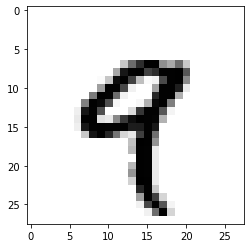

In [27]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [28]:
train_labels[4]

9

In [29]:
# 넘파이로 텐서 조작하기
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [31]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [32]:
my_slice = train_images[:, 14:, 14:]

In [33]:
my_slice = train_images[:, 7:-7, 7:-7]

In [34]:
#배치 데이터
batch = train_images[:128]

In [35]:
batch = train_images[128:256]

In [36]:
n=3
batch = train_images[128 * n:128 * (n+1)]

In [37]:
# 원소별 연산
def naive_relu(x):
    assert len(x.shape) ==2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i,j],0)
    return x

In [38]:
def naive_add(x,y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i,j]
    return x

In [39]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x+y
    z = np.maximum(z, 0.)
print("걸린 시간: {0: .2f} s".format(time.time() - t0))

걸린 시간:  0.00 s
걸린 시간:  0.00 s
걸린 시간:  0.00 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.01 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.02 s
걸린 시간:  0.

걸린 시간:  0.20 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.21 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s
걸린 시간:  0.22 s


In [40]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x,y)
    z = naive_relu(z)
print("걸린 시간: {0: .2f} s".format(time.time() - t0))

걸린 시간:  2.14 s


In [41]:
# 브로드캐스팅
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [42]:
y = np.expand_dims(y, axis=0)

In [43]:
Y = np.concatenate([y] * 32, axis=0)

In [44]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [45]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x,y)

In [46]:
# 텐서 곱셈
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x,y)

In [47]:
def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z=0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [49]:
def naive_matrix_vector_dot(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
    return z

In [50]:
def naive_matirx_vector_dot(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:], y)
    return z

In [51]:
def naive_matrix_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [52]:
# 텐서 크기 변환
train_images = train_images.reshape((60000, 28 * 28))

In [53]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [54]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [55]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [56]:
x = np.zeros((300,20))
x = np.transpose(x)
x.shape

(20, 300)

In [57]:
# 텐서플로의 그레디언트 테이프
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y,x)

In [58]:
x = tf.Variable(tf.zeros((2,2)))
with tf.GradientTape() as tape:
    y=2*x+3
grad_of_y_wrt_x = tape.gradient(y,x)

In [60]:
W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2,2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W,b])

In [61]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [62]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [63]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [64]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2568 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1038 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0688 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0501 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0375 - accuracy: 0.9887


In [65]:
# 단순한 Dense 클래스
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [66]:
# 단순한 Sequential 클래스
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [67]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [68]:
# 배치 제너레이터
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [69]:
# 훈련 스텝 실행하기
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [70]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [71]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [72]:
# 전체 훈련 루프
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [73]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 3.63
100번째 배치 손실: 2.28
200번째 배치 손실: 2.25
300번째 배치 손실: 2.11
400번째 배치 손실: 2.23
에포크 1
0번째 배치 손실: 1.92
100번째 배치 손실: 1.90
200번째 배치 손실: 1.87
300번째 배치 손실: 1.73
400번째 배치 손실: 1.84
에포크 2
0번째 배치 손실: 1.58
100번째 배치 손실: 1.59
200번째 배치 손실: 1.53
300번째 배치 손실: 1.43
400번째 배치 손실: 1.51
에포크 3
0번째 배치 손실: 1.32
100번째 배치 손실: 1.35
200번째 배치 손실: 1.25
300번째 배치 손실: 1.21
400번째 배치 손실: 1.27
에포크 4
0번째 배치 손실: 1.12
100번째 배치 손실: 1.16
200번째 배치 손실: 1.04
300번째 배치 손실: 1.04
400번째 배치 손실: 1.11
에포크 5
0번째 배치 손실: 0.97
100번째 배치 손실: 1.02
200번째 배치 손실: 0.90
300번째 배치 손실: 0.92
400번째 배치 손실: 0.99
에포크 6
0번째 배치 손실: 0.86
100번째 배치 손실: 0.91
200번째 배치 손실: 0.80
300번째 배치 손실: 0.83
400번째 배치 손실: 0.90
에포크 7
0번째 배치 손실: 0.78
100번째 배치 손실: 0.83
200번째 배치 손실: 0.72
300번째 배치 손실: 0.76
400번째 배치 손실: 0.83
에포크 8
0번째 배치 손실: 0.72
100번째 배치 손실: 0.76
200번째 배치 손실: 0.65
300번째 배치 손실: 0.70
400번째 배치 손실: 0.78
에포크 9
0번째 배치 손실: 0.67
100번째 배치 손실: 0.70
200번째 배치 손실: 0.60
300번째 배치 손실: 0.66
400번째 배치 손실: 0.74


In [74]:
# 모델 평가하기
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.81
